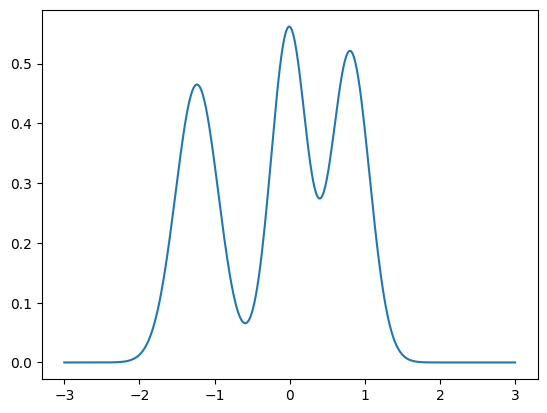

In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
from mixture_of_gaussians import random_isotropic_mog
import torch

gen = torch.Generator()
gen.manual_seed(0)
mog = random_isotropic_mog(num_modes=3, dim=1, generator=gen)

bound = 3
xs = torch.linspace(-bound, bound, 300).unsqueeze(-1)
pdf = mog.log_prob(xs).exp()

plt.plot(xs.numpy(), pdf.numpy())

0.0000


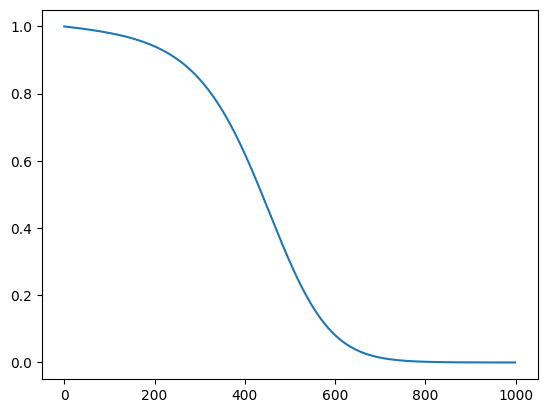

In [29]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler(
    num_train_timesteps=1000,
    beta_schedule="sigmoid",
    beta_start=0.0001,
    beta_end=0.02,
    clip_sample=False,
)


plt.plot(scheduler.alphas_cumprod)
print(f"{scheduler.alphas_cumprod[-1].item():.4f}")

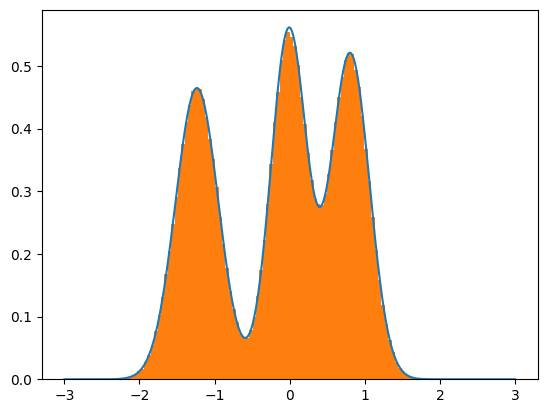

In [30]:
from mixture_of_gaussians import diffuse_mog


mixture_dist = mog.mixture_distribution
component_dist = mog.component_distribution
means = component_dist.loc
covariances = component_dist.covariance_matrix

t = torch.Tensor([0]).int()

diffused_mog = diffuse_mog(mog, scheduler.alphas_cumprod, t)

pdf_diffused = diffused_mog.log_prob(xs).exp()
plt.plot(xs.numpy(), pdf_diffused.numpy())

samples = mog.sample((1000000,))
diffused_samples = scheduler.add_noise(samples, torch.randn_like(samples), t)
plt.hist(diffused_samples.numpy(), bins=100, density=True)
plt.show()